In [83]:
%matplotlib inline

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [87]:
data_all = pd.DataFrame(columns=['concentration', 'power', 'signal'])
mean_all = pd.DataFrame(columns=['concentration', 'power', 'signal', 'std'])

powers = [0.62, 0.77, 0.92, 1.10, 1.31, 1.54, 1.77]
concentrations = [1, 0.1, 0.01, 0.001, 0.0001, 0]

for c in concentrations:
    for p in range(len(powers)):
        
        df = pd.read_csv('/home/julia/data/calcium_bold/calibration/3/%s_%s_0.5.csv' % (str(c), str(p+1)))
        
        data = {'concentration' : 20000*[c],
                'power' : 20000*[powers[p]],
                'signal' : df['signal[V]']}

        mean = {'concentration' : [c],
                'power' : [powers[p]],
                'signal' : np.mean(df['signal[V]']),
                'std' : np.std(df['signal[V]'])}

        data_all = data_all.append(pd.DataFrame(data))
        mean_all = mean_all.append(pd.DataFrame(mean))

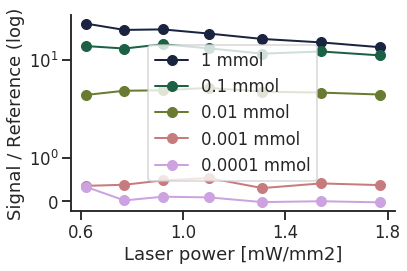

In [191]:
sns.set()
sns.set_context('talk')
sns.set_style('ticks')
ref = mean_all.loc[mean_all['concentration']==0]

fig = plt.figure(figsize=(6,4))
concentrations = [1, 0.1, 0.01, 0.001, 0.0001]
palette=sns.color_palette(palette="cubehelix", n_colors=len(concentrations)+1)
for c in range(len(concentrations)):
    mean = mean_all.loc[mean_all['concentration']==concentrations[c]]
    plt.plot(mean['power'], (mean['signal']-ref['signal'])/ref['signal'],
             marker='o', linestyle='-', linewidth=2, markersize=10, fillstyle='full',
             label='%s mmol' % str(concentrations[c]), 
             color=palette[c])
plt.xticks([0.6, 1.0, 1.4, 1.8])
plt.xlabel('Laser power [mW/mm2]')
plt.ylabel('Signal / Reference (log)')
plt.yscale('symlog')
sns.despine()
plt.legend()
plt.tight_layout()
plt.savefig('/home/julia/Documents/projects/fct_project/fig3_raw.svg')